In [ ]:
#Steps used for solving problem statement:
    #1:Using the given data(in .csv) first we shuffle data to avoid data leakage
    #2:Then we generate a new projected data(in .csv) for monthly salary increase by 8% of all customers overall
    #3:Now we plot this data using clustering

In [ ]:
#SHUFFLE DATA

import pandas as pd
import numpy as np

# Load your csv data
csv_data = pd.read_csv(r"/Users/rohitshetty/Desktop/AI:ML intern/spend.csv")
    
# Shuffle the data randomly
shuffled_data = csv_data.sample(frac=1).reset_index(drop=True)

# Save the shuffled data as csv
shuffled_data.to_csv('shuffled_data.csv', index=False)

In [2]:
# PROJECT DATA FOR 8% MONTHLY SALARY INCREASE

import pandas as pd
# load data from CSV file into a pandas dataframe
data = pd.read_csv(r"/Users/rohitshetty/Desktop/AI:ML intern/shuffled_data.csv")
old_monthly_income = data['Monthly Income in Rupees']
old_spending_score = data['Spending Score (1-100)']

# calculate projected spending scores using formula above
new_spending_score = (old_spending_score / old_monthly_income) * (1.08 * old_monthly_income)
data['Projected Spending Score'] = new_spending_score

# save the updated data as a new CSV file
data.to_csv('projected_data.csv', index=False)
print(new_spending_score)

0      62.64
1      84.24
2      62.64
3      43.20
4      37.80
       ...  
195    24.84
196    44.28
197    99.36
198    88.56
199    54.00
Length: 200, dtype: float64


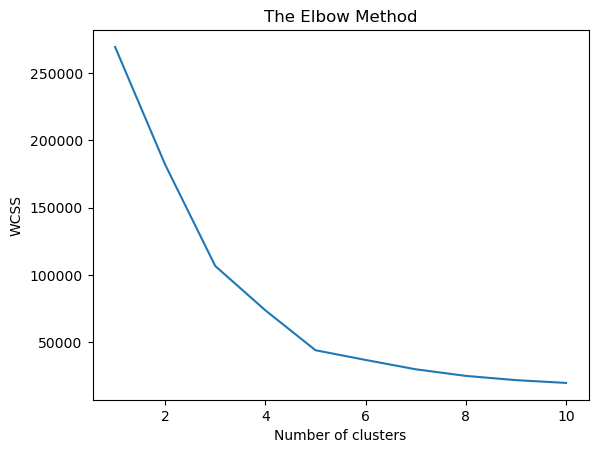

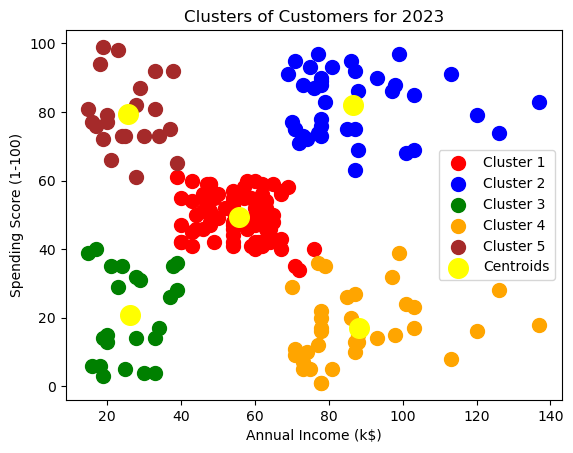

CLUSTER [5]
[269362.0, 181945.273929407, 106645.34867186728, 73745.38903948835, 44118.18384299544, 36903.54290577174, 29965.850008272573, 25066.94657839489, 21914.809270404396, 19839.251118326116]


In [1]:
# USE K-MEANS CLUSTERING
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"/Users/rohitshetty/Desktop/AI:ML intern/projected_data.csv")

# Extract the feature data
X = data.iloc[:, [3, 4]].values

# Determine the optimal number of clusters using the elbow method
wcss = [] # WITH CLUSTER SUM OF SQUARE 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means Clustering to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)


# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers for 2023')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


cluster_label = kmeans.predict([[50,80]])
print(f"CLUSTER {cluster_label+1}")

#print(X)
print(wcss)

In [ ]:
Within-Cluster Sum of Squares (WCSS): The WCSS measures the sum of the squared distances between each data point and its assigned centroid. 
A lower WCSS indicates a more compact and well-separated cluster.

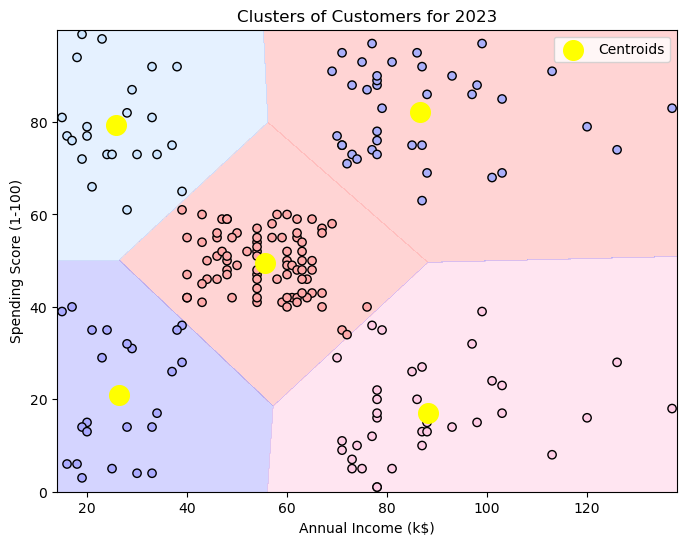

Silhouette Score: 0.5571094269566109
Davies-Bouldin Score: 0.5673375786547572
Calinski-Harabasz Score: 248.8913885651109


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the data
data = pd.read_csv(r"/Users/rohitshetty/Desktop/AI:ML intern/projected_data.csv")

# Extract the feature data
X = data.iloc[:, [3, 4]].values

# Use K-Means Clustering to the dataset with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Create a meshgrid to plot the decision boundary
resolution = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colormap for the plot
cmap = ListedColormap(['#FFAAAA', '#AAAFFA', '#AAAAFF', '#FFCCE5', '#CCE5FF'])

# Plot the clusters and the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap=cmap, edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers for 2023')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# silhouette score
silhouette = silhouette_score(X, y_kmeans)

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X, y_kmeans)

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)
